In [11]:
from flowtracks.io import Scene
import numpy as np

# install plotly express https://plot.ly/python/getting-started/
import plotly.express as px
import pandas as pd

In [12]:
particles = Scene('./test_h5/traj_GT.h5')

In [26]:
pos,vel = [],[]
for id in particles.trajectory_ids():
    tr = particles.trajectory_by_id(id)
    pos.append(np.c_[tr.pos()[:,0],tr.pos()[:,1],tr.pos()[:,2]])
    vel.append(np.c_[tr.velocity()[:,0],tr.velocity()[:,1],tr.velocity()[:,2]])
    
df = pd.DataFrame(np.c_[np.vstack(pos),np.vstack(vel)])
df.columns = ['x','y','z','u','v','w']
df['vel'] = np.sqrt(df['u']**2+df['v']**2+df['w']**2)

In [27]:
df.head()

,x,y,z,u,v,w,vel
0,4.485415,5.202073,5.284457,0.542498,-2.014971,0.827312,2.244740
1,4.490840,5.181923,5.292730,0.579119,-2.105522,0.811195,2.329515
2,4.496631,5.160868,5.300842,0.519180,-1.797899,0.674653,1.989257
3,4.503064,5.138841,5.308848,0.580756,-1.881337,0.677363,2.082193
4,4.510454,5.115740,5.316877,0.653013,-1.961350,0.702453,2.183291


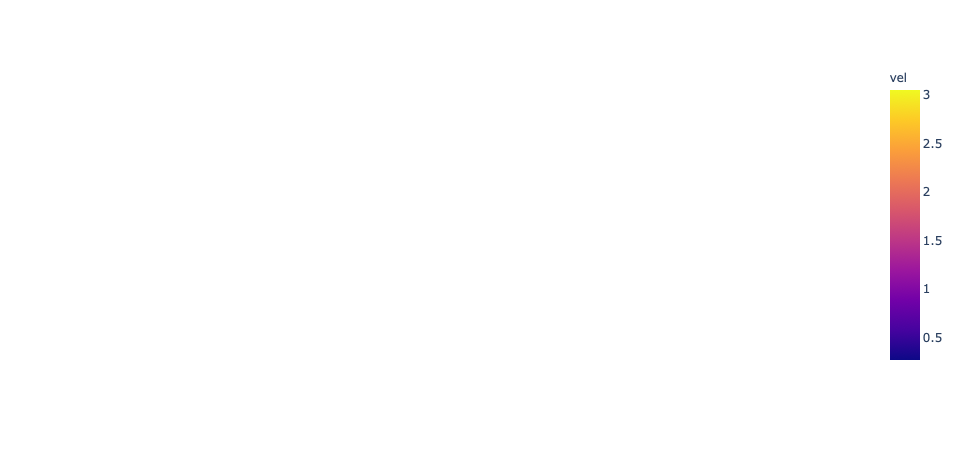

In [28]:
fig = px.scatter_3d(df,x='x',y='y',z='z',color=df.vel)
    
fig.show()